# IMPORT LIBRARIES

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [191]:
# Opening of Data file and study of general information

epl = pd.read_csv("EPL_20_21.csv")
epl.info()
epl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [192]:
# Check missing values
epl.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [193]:
epl['NPGA_per_90'] = ((epl['Goals']-epl['Penalty_Goals']+epl['Assists'])/epl['Mins']*90).astype(float).round(2)
epl['NPG_per_90'] = ((epl['Goals']-epl['Penalty_Goals'])/epl['Mins']*90).astype(float).round(2)
epl['Assists_per_90'] = (epl['Assists'] / epl['Mins'] * 90).astype(float).round(2)
epl['Goals+Assists'] = (epl['Goals']+epl['Assists']).astype(int)
epl.head()






,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,NPGA_per_90,NPG_per_90,Assists_per_90,Goals+Assists
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,...,1,1,0.21,0.24,2,0,0.31,0.16,0.16,11
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,0,0,0.00,0.00,2,0,0.00,0.00,0.00,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,0,0,0.41,0.21,2,0,0.48,0.21,0.28,14
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,0,0,0.10,0.11,3,0,0.31,0.12,0.20,8
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,0,0,0.06,0.12,3,0,0.11,0.04,0.08,3


In [194]:
top_G_A = epl[['Name', 'Club', 'Goals+Assists', 'Matches']].nlargest(10, 'Goals+Assists')
top_G_A

,Name,Club,Goals+Assists,Matches
162,Harry Kane,Tottenham Hotspur,37,35
51,Bruno Fernandes,Manchester United,30,37
81,Mohamed Salah,Liverpool FC,27,37
161,Son Heung-min,Tottenham Hotspur,27,37
110,Jamie Vardy,Leicester City,24,34
214,Patrick Bamford,Leeds United,24,38
54,Marcus Rashford,Manchester United,20,37
267,Ollie Watkins,Aston Villa,19,37
34,Kevin De Bruyne,Manchester City,18,25
86,Sadio Mané,Liverpool FC,18,35


In [195]:
top_10_goals = epl[['Name', 'Club', 'Goals', 'Matches']].nlargest(10,'Goals')
top_10_goals 

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [196]:
top_10_assist = epl[['Name', 'Club', 'Assists', 'Matches']].nlargest(10,'Assists')
top_10_assist


,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


In [197]:
# English players Midfielder , Minutes Greater than 2500 and Percentage of Passess Completed by 65 

filtered_players = epl.query('Nationality == "ENG" & Mins >= 2500 & Perc_Passes_Completed >= 65')


MF_filter = filtered_players[filtered_players['Position'].str.contains('MF')]

top_10_forwards = MF_filter.nlargest(10, "Goals")

top_10_forwards


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,NPGA_per_90,NPG_per_90,Assists_per_90,Goals+Assists
141,Jarrod Bowen,West Ham United,ENG,"FW,MF",23,38,30,2562,8,5,...,0,0,0.22,0.16,0,0,0.46,0.28,0.18,13
216,Jack Harrison,Leeds United,ENG,MF,23,36,34,2847,8,8,...,0,0,0.21,0.22,2,0,0.51,0.25,0.25,16
366,James Ward-Prowse,Southampton,ENG,MF,25,38,38,3420,8,7,...,3,4,0.14,0.11,5,0,0.32,0.13,0.18,15
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,...,1,1,0.21,0.24,2,0,0.31,0.16,0.16,11
345,Eberechi Eze,Crystal Palace,ENG,MF,22,34,29,2559,4,6,...,0,0,0.08,0.10,3,0,0.35,0.14,0.21,10
449,Ademola Lookman,Fulham,ENG,"FW,MF",22,34,31,2747,4,4,...,0,1,0.18,0.17,5,0,0.26,0.13,0.13,8
422,Ashley Westwood,Burnley,ENG,MF,30,38,38,3410,3,3,...,0,0,0.03,0.13,7,0,0.16,0.08,0.08,6
139,Declan Rice,West Ham United,ENG,MF,21,32,32,2879,2,1,...,1,2,0.10,0.06,2,0,0.06,0.03,0.03,3
424,Dwight McNeil,Burnley,ENG,MF,20,36,34,3069,2,5,...,0,0,0.03,0.19,1,0,0.21,0.06,0.15,7
480,Conor Gallagher,West Bromwich Albion,ENG,MF,20,30,28,2531,2,2,...,0,0,0.06,0.06,11,0,0.14,0.07,0.07,4


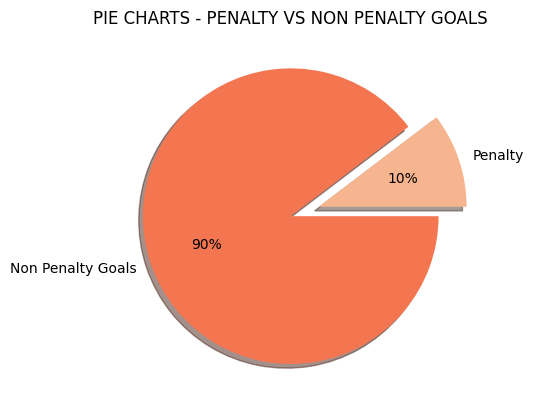

In [198]:
#PIE CHART PENALTY VS NON PENALTY GOALS
Total_Penalty = epl['Penalty_Goals'].sum()
Total_Non_Penalty_Goals = epl['Goals'].sum() - Total_Penalty
data = [Total_Penalty,Total_Non_Penalty_Goals]
labels = ['Penalty', 'Non Penalty Goals']
color_palette = sns.color_palette("rocket_r")
myexplode = [0.2, 0]
plt.pie(data, labels=labels, colors=color_palette, autopct='%.0f%%', explode=myexplode, shadow= True)
plt.title('PIE CHARTS - PENALTY VS NON PENALTY GOALS')
plt.show()




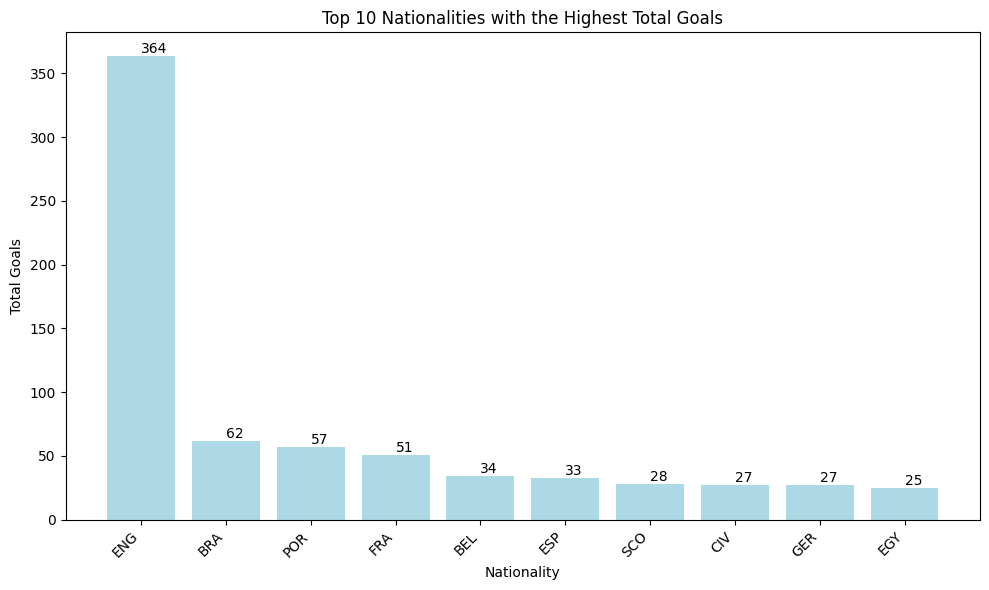

In [212]:


# Assuming 'epl' is your DataFrame and it has been properly imported

# Group by nationality and sum the goals
nationality_goals = epl.groupby('Nationality')['Goals'].sum().reset_index()

# Sort the grouped data by total goals in descending order
nationality_goals_sorted = nationality_goals.sort_values(by='Goals', ascending=False)

# Select the top 10 rows
top_10 = nationality_goals_sorted.head(10)

plt.figure(figsize=(10, 6))

# Plot the bar chart
bars = plt.bar(top_10["Nationality"], top_10["Goals"], color='lightblue')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Nationality')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Goals')
plt.title('Top 10 Nationalities with the Highest Total Goals')

plt.tight_layout()
plt.show()


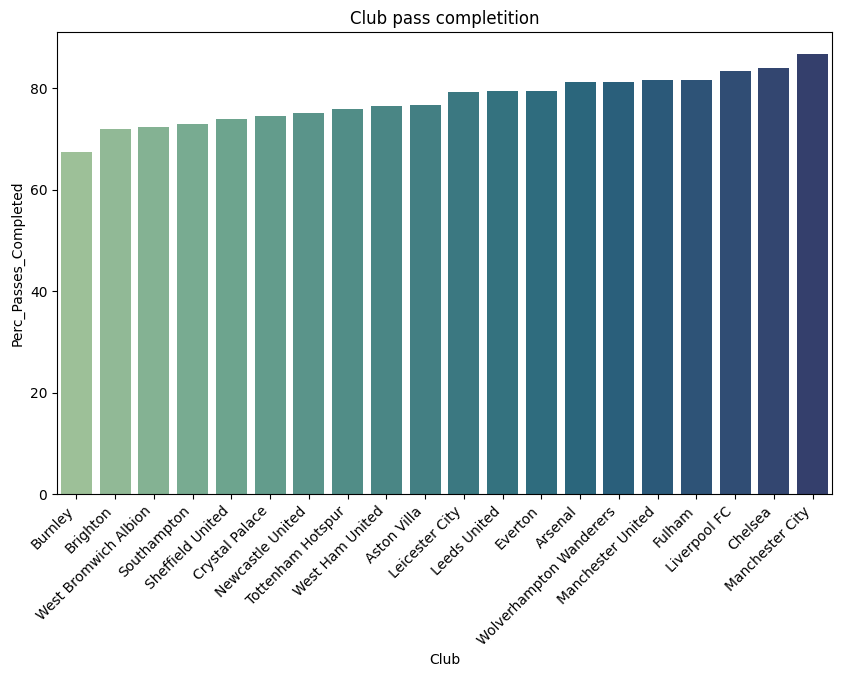

In [200]:
plt.figure(figsize=(10,6))
ClubvsPasscompleted = epl.groupby('Club')['Perc_Passes_Completed'].mean().reset_index(name = 'Perc_Passes_Completed').sort_values(by = 'Perc_Passes_Completed', ascending= True)
sns.barplot(data=ClubvsPasscompleted, x = 'Club' , y= 'Perc_Passes_Completed', palette = 'crest')
plt.title('Club pass completition')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Club pass completition')



plt.show()


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Goals'),
  Text(1.5, 0, 'Assists'),
  Text(2.5, 0, 'xG'),
  Text(3.5, 0, 'xA')])

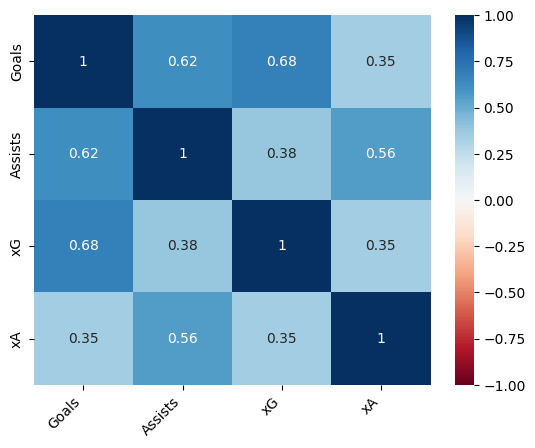

In [201]:
Stats = epl[['Goals','Assists',"xG",'xA']]
data1 = Stats.corr()
sns.heatmap(data1, vmin= -1, vmax= 1, annot=True, cmap= 'RdBu')
plt.xticks(rotation = 45, ha = 'right')


In [202]:
Stats2 = epl[["Age", "Matches", "Starts", "Mins", "Goals", "Assists", "Penalty_Goals", "Penalty_Attempted", "xG", "xA","Yellow_Cards", "Red_Cards","NPGA_per_90", "NPG_per_90", "Assists_per_90", "Goals+Assists"]]
Stats2.corr()

,Age,Matches,Starts,Mins,Goals,Assists,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,NPGA_per_90,NPG_per_90,Assists_per_90,Goals+Assists
Age,1.000000,0.149628,0.156387,0.158643,0.047022,0.026740,0.084547,0.083328,-0.056098,-0.047849,0.115191,0.065414,0.013830,-0.003688,0.032393,0.043318
Matches,0.149628,1.000000,0.938116,0.947351,0.441977,0.508009,0.227929,0.234389,0.192047,0.227570,0.578093,0.168281,0.303394,0.244831,0.251166,0.516545
Starts,0.156387,0.938116,1.000000,0.997031,0.405381,0.477704,0.216877,0.221418,0.072487,0.113446,0.603497,0.195383,0.196417,0.155151,0.166800,0.478784
Mins,0.158643,0.947351,0.997031,1.000000,0.400398,0.474677,0.219027,0.224115,0.075016,0.117602,0.604634,0.193038,0.194479,0.151445,0.168058,0.474112
Goals,0.047022,0.441977,0.405381,0.400398,1.000000,0.617831,0.594730,0.590492,0.681959,0.348428,0.104413,0.057785,0.744442,0.781805,0.373246,0.942191
Assists,0.026740,0.508009,0.477704,0.474677,0.617831,1.000000,0.408459,0.411784,0.383358,0.558677,0.213691,-0.020855,0.637347,0.369167,0.720136,0.845589
Penalty_Goals,0.084547,0.227929,0.216877,0.219027,0.594730,0.408459,1.000000,0.982176,0.407251,0.205417,0.057846,0.021109,0.280724,0.234347,0.223177,0.577827
Penalty_Attempted,0.083328,0.234389,0.221418,0.224115,0.590492,0.411784,0.982176,1.000000,0.420159,0.218949,0.063506,0.031073,0.295732,0.250304,0.229779,0.576367
xG,-0.056098,0.192047,0.072487,0.075016,0.681959,0.383358,0.407251,0.420159,1.000000,0.346551,-0.094216,-0.021578,0.675608,0.715138,0.331502,0.626353
xA,-0.047849,0.227570,0.113446,0.117602,0.348428,0.558677,0.205417,0.218949,0.346551,1.000000,0.022375,-0.056837,0.578087,0.329852,0.659884,0.474624


In [203]:
Matrix1 = Stats2.corr()
corr_pairs1 = Matrix1.unstack()
pd.set_option('display.max_rows', None)
sorted_corr = corr_pairs1.sort_values()
sorted_corr

xG                 Yellow_Cards        -0.094216
Yellow_Cards       xG                  -0.094216
Red_Cards          Assists_per_90      -0.060615
Assists_per_90     Red_Cards           -0.060615
Red_Cards          xA                  -0.056837
xA                 Red_Cards           -0.056837
xG                 Age                 -0.056098
Age                xG                  -0.056098
                   xA                  -0.047849
xA                 Age                 -0.047849
NPGA_per_90        Red_Cards           -0.031273
Red_Cards          NPGA_per_90         -0.031273
NPG_per_90         Yellow_Cards        -0.031185
Yellow_Cards       NPG_per_90          -0.031185
Red_Cards          xG                  -0.021578
xG                 Red_Cards           -0.021578
Assists            Red_Cards           -0.020855
Red_Cards          Assists             -0.020855
Age                NPG_per_90          -0.003688
NPG_per_90         Age                 -0.003688
NPGA_per_90        Y

In [204]:
max = sorted_corr[(sorted_corr) > 0.7]
between = max[(max) < 0.999999]
between.drop_duplicates()





NPG_per_90         xG                0.715138
Assists            Assists_per_90    0.720136
NPGA_per_90        Goals             0.744442
Assists_per_90     NPGA_per_90       0.745731
NPGA_per_90        Goals+Assists     0.777006
NPG_per_90         Goals             0.781805
Goals+Assists      Assists           0.845589
NPG_per_90         NPGA_per_90       0.866640
Starts             Matches           0.938116
Goals              Goals+Assists     0.942191
Mins               Matches           0.947351
Penalty_Attempted  Penalty_Goals     0.982176
Mins               Starts            0.997031
dtype: float64

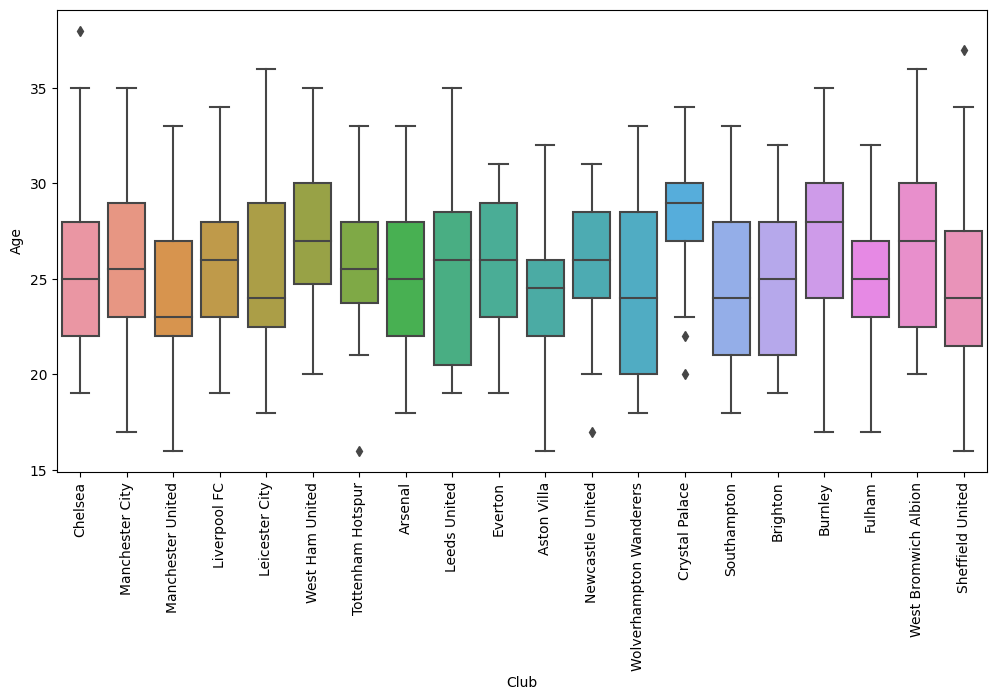

In [205]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Club', y = 'Age', data = epl)
plt.xticks(rotation = 90)
plt.show()